# Exploratory Analysis of Reddit World News

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re
import os
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv('reddit_worldnews.csv')
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [3]:
df.shape

(509236, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
time_created    509236 non-null int64
date_created    509236 non-null object
up_votes        509236 non-null int64
down_votes      509236 non-null int64
title           509236 non-null object
over_18         509236 non-null bool
author          509236 non-null object
subreddit       509236 non-null object
dtypes: bool(1), int64(3), object(4)
memory usage: 27.7+ MB


In [17]:
df.date_created = pd.to_datetime(df.date_created)

In [22]:
print('Date created ranges from', df['date_created'].min(), 'to', df['date_created'].max(), '.')

Date created ranges from 2008-01-25 00:00:00 to 2016-11-22 00:00:00 .


In [49]:
df_1 = df[['date_created', 'up_votes', 'down_votes']]

In [50]:
df_1.date_created=[time.strftime('%Y') for time in df_1.date_created]

In [51]:
df_size=df_1.groupby('date_created').size().to_frame()
df_size=df_size.rename(columns={0:'count'})

## News count by year

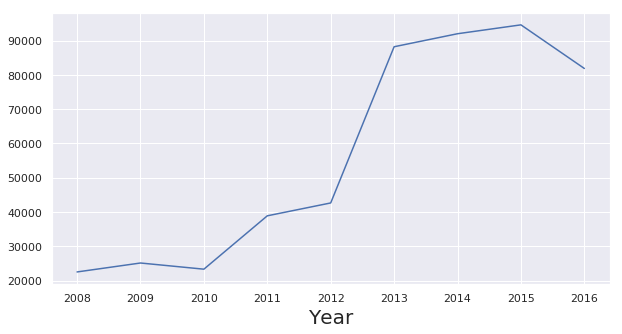

In [62]:
import matplotlib.pyplot as plt
plt.plot(list(df_size.index),df_size['count'])
plt.xlabel('Year', fontsize=20)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

### We can see that from 2012 to 2013, the amount of news around the world in Reddit increases significantly. 

In [75]:
df_2 = df[['date_created', 'up_votes', 'down_votes']]
df_2.date_created=[time.strftime('%b') for time in df_2.date_created]
df_size2=df_2.groupby('date_created').size().to_frame()
df_size2=df_size2.rename(columns={0:'count'})

In [79]:
df_size2=df_size2.sort_values(by='count')

## News count by month

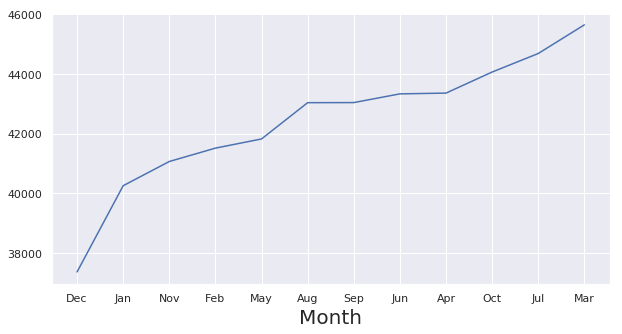

In [80]:
import matplotlib.pyplot as plt
plt.plot(list(df_size2.index),df_size2['count'])
plt.xlabel('Month', fontsize=20)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

In [87]:
import spacy
#spacy.load('en')
#from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import re
import os
def cleanContent(contents):
    contents_new=[]
    contents_list = contents.tolist()
    tweets_list_new=[]
    for tweet in contents_list:
        if 'http' in tweet:
            index = tweet.rfind('http')
            tweet = tweet.replace(tweet[index:], '')
        tweets_list_new.append(tweet)
    for content in tweets_list_new:
        # Convert to lowercase
        content_low=content.lower()
        # Remove punctuation and any other non-alphabet characters
        content_low_pnt = re.sub(r'[^\w\s]', '', content_low)
        content_low_pnt = content_low_pnt.replace(os.linesep, " ")
        content_low_pnt = content_low_pnt.replace("\t", " ")
        content_low_pnt_alpha = re.sub('[^A-Za-z\s]', '', content_low_pnt)
        # Remove stopwords
        words=content_low_pnt_alpha.split()
        no_stop_words=[word for word in words if word not in STOP_WORDS]
        content=' '.join(no_stop_words)
        contents_new.append(content)
    return contents_new

In [90]:
df_text=df.copy()
df_text['title']=cleanContent(df_text['title'])

In [95]:
titles=""
for title in df_text['title']:
    titles += title

## WordCloud of words in news titles

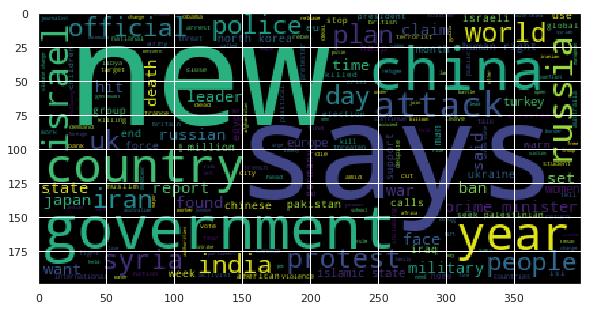

In [96]:
from wordcloud import WordCloud
wordcloud=WordCloud().generate(titles)
plt.imshow(wordcloud)
plt.show()

## Upvotes

In [97]:
df.up_votes.describe()

count    509236.000000
mean        112.236283
std         541.694675
min           0.000000
25%           1.000000
50%           5.000000
75%          16.000000
max       21253.000000
Name: up_votes, dtype: float64

In [98]:
df.up_votes.median()

5.0

In [99]:
df.up_votes.mean()

112.23628337352426

Text(0, 0.5, 'Logscale frequency')

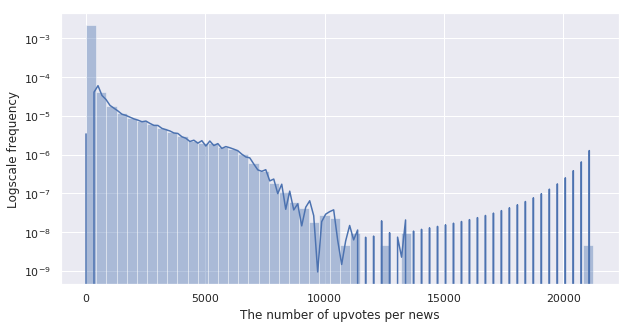

In [104]:
import seaborn as sns
ax=sns.distplot(df.up_votes, kde=True)
ax.set_yscale('log')
ax.set_xlabel('The number of upvotes per news')
ax.set_ylabel('Logscale frequency')

### The distribution of the number of upvotes per news is greatly right skewed.

In [106]:
df_votes=df.copy()
df_votes=df_votes[df_votes.up_votes>=df_votes.up_votes.mean()]
len(df_votes)

47902

In [108]:
df_votes.title=cleanContent(df_votes.title)
titles1=""
for title in df_votes['title']:
    titles1 += title

## The WordCloud of news titles that have more than average number of upvotes

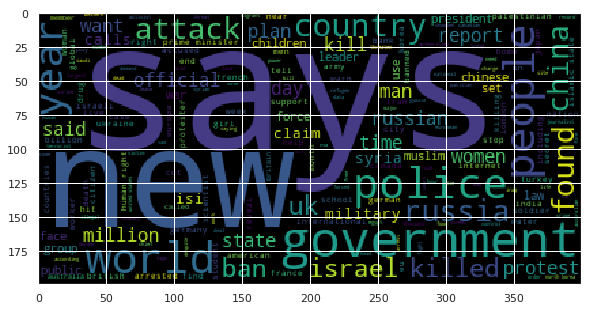

In [109]:
from wordcloud import WordCloud
wordcloud=WordCloud().generate(titles1)
plt.imshow(wordcloud)
plt.show()

### As we compare it to the wordcloud above it, we can see that most frequent words still largely apply. 'china' looks smaller here.

In [117]:
author_counts=df_votes['author'].value_counts().to_frame().rename(columns={'author':'counts'})
author_counts.head()

,counts
maxwellhill,1494
anutensil,1353
Libertatea,576
DoremusJessup,505
davidreiss666,434


Text(0, 0.5, 'Frequency')

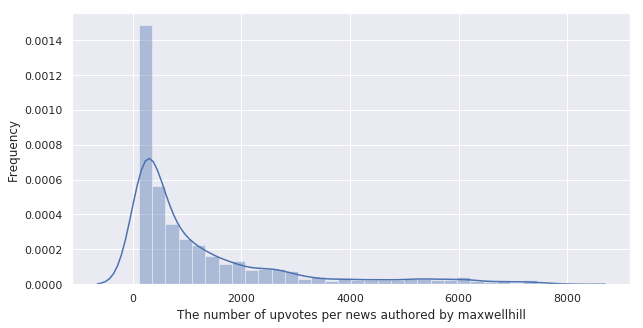

In [120]:
import seaborn as sns
ax=sns.distplot(df_votes[df_votes.author=='maxwellhill']['up_votes'], kde=True)
ax.set_xlabel('The number of upvotes per news authored by maxwellhill')
ax.set_ylabel('Frequency')